In [4]:
import pandas as pd
import numpy as np

In [5]:
filled_df = pd.read_csv("../Data/New_york/filled_views.csv")
links = pd.read_csv("../Data/New_york/importantStructureOutgoing.csv")


In [6]:
combination = filled_df.merge(links,on="link",how="right")
ml_output = []
ml_link = []
for base in links["base"].sort_values().unique():
  ml_output += filled_df[filled_df["link"] == base].sort_values("date")["views"].to_list()
  ml_link += filled_df[filled_df["link"] == base]["link"].to_list()
len(ml_link)

9300

In [7]:
combination = combination.sort_values(["base", "date"], ignore_index=True)
ml_input = []
for base in combination["base"].unique():
  for date in combination["date"].unique():
    ml_input.append(combination[(combination["base"] == base) & (combination["date"] == date)])

In [34]:
def create_date_feature(date):
  pd_date = pd.to_datetime(date, format='%Y%m%d%H')
  return [pd_date.dayofweek,pd_date.day]


ml_input_value = [e["views"].tolist() + list(np.zeros(30- len(e["views"].tolist()))) + create_date_feature(e.iloc[0]["date"]) for e in ml_input]
ml_input_value[0]

[1556.0,
 174.0,
 22.0,
 44.0,
 108.0,
 221.0,
 4378.0,
 228.0,
 186.0,
 37.0,
 8.0,
 1003.0,
 522.0,
 101.0,
 22.0,
 133.0,
 40.0,
 57.0,
 36.0,
 0.0,
 15.0,
 61.0,
 1718.0,
 89.0,
 53.0,
 989.0,
 26.0,
 238.0,
 84.0,
 0.0,
 5,
 1]

In [42]:
ml_output[0]

684.0

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = ml_input_value
y = ml_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeRegressor(random_state=0)

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print the results
print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Predicted: [ 17.   0.   0. ... 218.   0.  24.]
Actual: [15.0, 0.0, 2.0, 1.0, 1.0, 0.0, 561.0, 0.0, 103.0, 49.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 606.0, 120.0, 0.0, 0.0, 524.0, 0.0, 28.0, 4.0, 164.0, 6.0, 0.0, 9.0, 0.0, 1.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 21.0, 1.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 0.0, 3.0, 0.0, 1.0, 33.0, 0.0, 12.0, 0.0, 3.0, 3.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 2.0, 27.0, 204.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 35.0, 2.0, 1.0, 18.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0, 6.0, 0.0, 64.0, 6.0, 6.0, 0.0, 0.0, 1.0, 119.0, 0.0, 13.0, 25.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 24.0, 139.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 7.0, 0.0, 0.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 4.0, 2.0, 3.0, 162.0, 38.0, 0.0, 0.0, 0.0, 4.0, 1.0, 10.0, 0.0, 0.0, 27.0, 1

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


scaler = StandardScaler()

X = scaler.fit_transform(ml_input_value)
y = ml_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=1)

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print the results
print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Predicted: [1.1420e+01 1.4000e-01 1.3000e+00 ... 2.0441e+02 1.1600e+00 4.5750e+01]
Actual: [15.0, 0.0, 2.0, 1.0, 1.0, 0.0, 561.0, 0.0, 103.0, 49.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 606.0, 120.0, 0.0, 0.0, 524.0, 0.0, 28.0, 4.0, 164.0, 6.0, 0.0, 9.0, 0.0, 1.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 21.0, 1.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 0.0, 3.0, 0.0, 1.0, 33.0, 0.0, 12.0, 0.0, 3.0, 3.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 2.0, 27.0, 204.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 35.0, 2.0, 1.0, 18.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0, 6.0, 0.0, 64.0, 6.0, 6.0, 0.0, 0.0, 1.0, 119.0, 0.0, 13.0, 25.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 24.0, 139.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 7.0, 0.0, 0.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 4.0, 2.0, 3.0, 162.0, 38.0, 0.0, 0.0, 0.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


scaler = StandardScaler()

X = scaler.fit_transform(ml_input_value)
y = ml_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=1)

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print the results
print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Predicted: [1.1420e+01 1.4000e-01 1.3000e+00 ... 2.0441e+02 1.1600e+00 4.5750e+01]
Actual: [15.0, 0.0, 2.0, 1.0, 1.0, 0.0, 561.0, 0.0, 103.0, 49.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 606.0, 120.0, 0.0, 0.0, 524.0, 0.0, 28.0, 4.0, 164.0, 6.0, 0.0, 9.0, 0.0, 1.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 21.0, 1.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 0.0, 3.0, 0.0, 1.0, 33.0, 0.0, 12.0, 0.0, 3.0, 3.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 2.0, 27.0, 204.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 35.0, 2.0, 1.0, 18.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0, 6.0, 0.0, 64.0, 6.0, 6.0, 0.0, 0.0, 1.0, 119.0, 0.0, 13.0, 25.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 24.0, 139.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 7.0, 0.0, 0.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 4.0, 2.0, 3.0, 162.0, 38.0, 0.0, 0.0, 0.

In [45]:
import lightgbm as lgb

X = np.array(ml_input_value)
y = ml_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0

}

num_rounds = 400  # Change the number of boosting rounds as required
model = lgb.train(params, train_data, num_rounds)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Predicted: [  9.60910266  -0.28987099   1.70379991 ... 224.43874666   0.77836391
  43.87858237]
Actual: [15.0, 0.0, 2.0, 1.0, 1.0, 0.0, 561.0, 0.0, 103.0, 49.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 606.0, 120.0, 0.0, 0.0, 524.0, 0.0, 28.0, 4.0, 164.0, 6.0, 0.0, 9.0, 0.0, 1.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 21.0, 1.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 0.0, 3.0, 0.0, 1.0, 33.0, 0.0, 12.0, 0.0, 3.0, 3.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 2.0, 27.0, 204.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 35.0, 2.0, 1.0, 18.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0, 6.0, 0.0, 64.0, 6.0, 6.0, 0.0, 0.0, 1.0, 119.0, 0.0, 13.0, 25.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 24.0, 139.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 7.0, 0.0, 0.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 4.0, 2.0, 3.0, 162.0, 38.0,

In [37]:
import math

date_map = {
  0: [1,0,0,0,0,0,0],
  1: [0,1,0,0,0,0,0],
  2: [0,0,1,0,0,0,0],
  3: [0,0,0,1,0,0,0],
  4: [0,0,0,0,1,0,0],
  5: [0,0,0,0,0,1,0],
  6: [0,0,0,0,0,0,1]
}

def create_one_hot(value, size):
  out = np.zeros(size)
  out[value] = 1
  return list(out)

def create_date_feature2(date):
  pd_date = pd.to_datetime(date, format='%Y%m%d%H')
  return date_map[pd_date.dayofweek] + [pd_date.day]#create_one_hot(math.floor(pd_date.day/10)-1,math.floor(31/10))

In [38]:
ml_input_value = [e["views"].tolist() + list(np.zeros(30- len(e["views"].tolist()))) + create_date_feature2(e.iloc[0]["date"]) for e in ml_input]
ml_input_value[0]

[1556.0,
 174.0,
 22.0,
 44.0,
 108.0,
 221.0,
 4378.0,
 228.0,
 186.0,
 37.0,
 8.0,
 1003.0,
 522.0,
 101.0,
 22.0,
 133.0,
 40.0,
 57.0,
 36.0,
 0.0,
 15.0,
 61.0,
 1718.0,
 89.0,
 53.0,
 989.0,
 26.0,
 238.0,
 84.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1]

In [39]:
np.shape(ml_input_value)

(9300, 38)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


scaler = StandardScaler()

X = scaler.fit_transform(ml_input_value)
y = ml_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=1)

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print the results
print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Predicted: [1.1770e+01 1.7000e-01 1.4400e+00 ... 2.0587e+02 1.2300e+00 4.4690e+01]
Actual: [15.0, 0.0, 2.0, 1.0, 1.0, 0.0, 561.0, 0.0, 103.0, 49.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 606.0, 120.0, 0.0, 0.0, 524.0, 0.0, 28.0, 4.0, 164.0, 6.0, 0.0, 9.0, 0.0, 1.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 21.0, 1.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 0.0, 3.0, 0.0, 1.0, 33.0, 0.0, 12.0, 0.0, 3.0, 3.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 2.0, 27.0, 204.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 35.0, 2.0, 1.0, 18.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0, 6.0, 0.0, 64.0, 6.0, 6.0, 0.0, 0.0, 1.0, 119.0, 0.0, 13.0, 25.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 24.0, 139.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 7.0, 0.0, 0.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 4.0, 2.0, 3.0, 162.0, 38.0, 0.0, 0.0, 0.

In [9]:
import math

date_map = {
  0: [1,0,0,0,0,0,0],
  1: [0,1,0,0,0,0,0],
  2: [0,0,1,0,0,0,0],
  3: [0,0,0,1,0,0,0],
  4: [0,0,0,0,1,0,0],
  5: [0,0,0,0,0,1,0],
  6: [0,0,0,0,0,0,1]
}

month_map = {
  7: [1,0,0,0],
  8: [0,1,0,0],
  9: [0,0,1,0],
  10: [0,0,0,1]
}

def create_one_hot(value, size):
  out = np.zeros(size)
  out[value] = 1
  return list(out)

def create_date_feature3(date):
  pd_date = pd.to_datetime(date, format='%Y%m%d%H')
  return date_map[pd_date.dayofweek] + month_map[pd_date.month] + [pd_date.day]

In [10]:
ml_input_value = [e["views"].tolist() + list(np.zeros(30- len(e["views"].tolist()))) + create_date_feature3(e.iloc[0]["date"]) for e in ml_input]
np.shape(ml_input_value)

(9300, 42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


scaler = StandardScaler()

X = scaler.fit_transform(ml_input_value)
y = ml_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=1)

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print the results
print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Predicted: [1.1450e+01 1.6000e-01 1.4800e+00 ... 2.0848e+02 1.2400e+00 4.4060e+01]
Actual: [15.0, 0.0, 2.0, 1.0, 1.0, 0.0, 561.0, 0.0, 103.0, 49.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 606.0, 120.0, 0.0, 0.0, 524.0, 0.0, 28.0, 4.0, 164.0, 6.0, 0.0, 9.0, 0.0, 1.0, 22.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 21.0, 1.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 0.0, 3.0, 0.0, 1.0, 33.0, 0.0, 12.0, 0.0, 3.0, 3.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0, 16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 2.0, 27.0, 204.0, 0.0, 1.0, 0.0, 0.0, 0.0, 4.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 1.0, 35.0, 2.0, 1.0, 18.0, 3.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 4.0, 6.0, 0.0, 64.0, 6.0, 6.0, 0.0, 0.0, 1.0, 119.0, 0.0, 13.0, 25.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 24.0, 139.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 7.0, 0.0, 0.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 4.0, 2.0, 3.0, 162.0, 38.0, 0.0, 0.0, 0.

Text(0.5, 0, 'Vorhergesagt Aufrufzahlen')

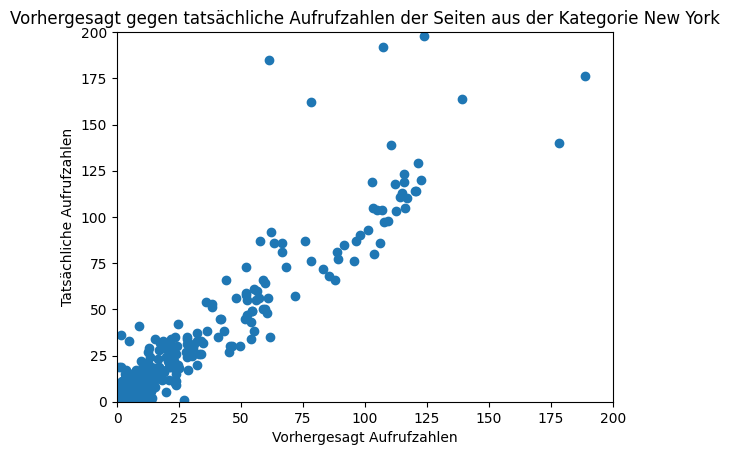

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.axis([0, 200, 0, 200])
plt.title("Vorhergesagt gegen tatsächliche Aufrufzahlen der Seiten aus der Kategorie New York")
plt.ylabel("Tatsächliche Aufrufzahlen")
plt.xlabel("Vorhergesagt Aufrufzahlen")

In [17]:
nah_ost_train = pd.read_csv("../Data/Nahost/training_nahost.csv")
nah_ost_y = pd.read_csv("../Data/Nahost/y_nahost.csv")
nah_ost_actual = pd.read_csv("../Data/Nahost/actual_nahost.csv")
nah_ost_test = pd.read_csv("../Data/Nahost/test_nahost.csv")

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=1)

model.fit(nah_ost_train, nah_ost_y)

# make predictions
y_pred = model.predict(X_test)

# print the results
print('Predicted:', y_pred)
print('Actual:', y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))